In [1]:
from game import *
from policy import *
from simulator import *

c:\Users\zhufe\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\zhufe\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\zhufe\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Users\zhufe\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Benchmark

In [3]:
Evaluator(policy = Benchmark()).evaluate(num_episodes = 100000)

100%|██████████| 100000/100000 [00:02<00:00, 42731.19it/s]


-0.10062

# MC Bootstrap

In [16]:
mc_policy = Easy21Policy()
mc_simulator = MonteCarloSimulator(policy = mc_policy)
mc_simulator.run(num_episodes = 100000)

100%|██████████| 100000/100000 [01:37<00:00, 1020.59it/s]


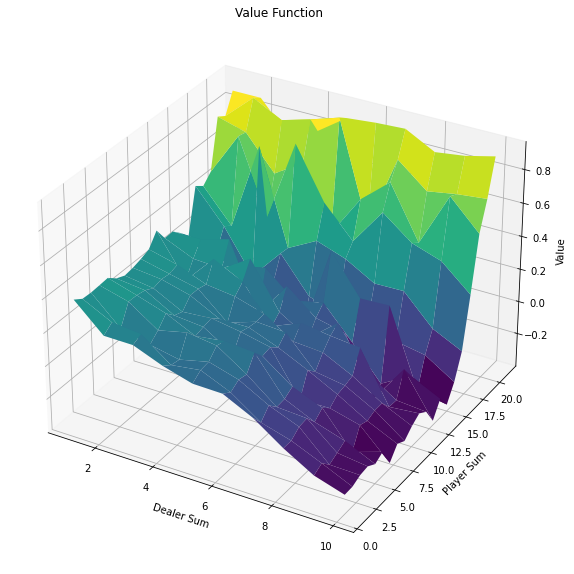

In [17]:
mc_policy.plot_value_function()

In [24]:
Evaluator(policy = mc_policy).evaluate(num_episodes = 100000)

100%|██████████| 100000/100000 [00:03<00:00, 25915.86it/s]


0.04758

# SARSA Bootstrap

In [5]:
sarsa_policy = Easy21Policy()
sarsa_simulator = SARSALambdaSimulator(policy = sarsa_policy, lambda_ = 0.5)
sarsa_simulator.run(num_episodes = 50000)

100%|██████████| 50000/50000 [00:03<00:00, 14223.54it/s]


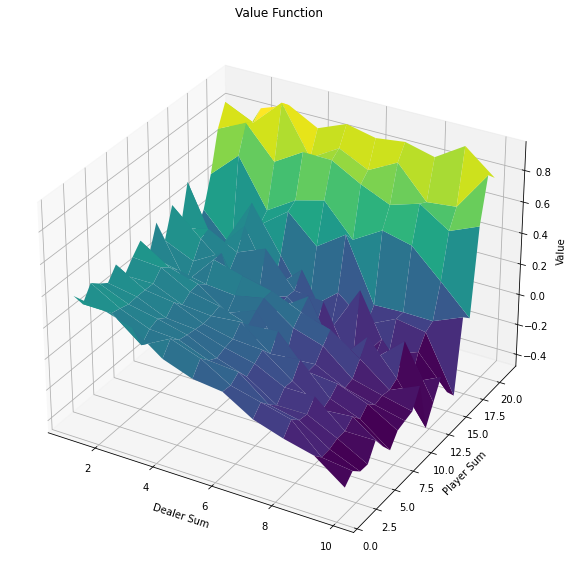

In [6]:
sarsa_policy.plot_value_function()

In [25]:
Evaluator(policy = sarsa_policy).evaluate(num_episodes = 100000)

100%|██████████| 100000/100000 [00:03<00:00, 25538.64it/s]


0.04908

# Linear Approximation

In [8]:
approx_model = Easy21ActionValueApproximation()
approx_simulator = ApproximationSimulator(model = approx_model, lambda_ = 0.5, learning_rate = 0.001)
approx_simulator.run(num_episodes = 100000)

100%|██████████| 100000/100000 [00:46<00:00, 2129.05it/s]


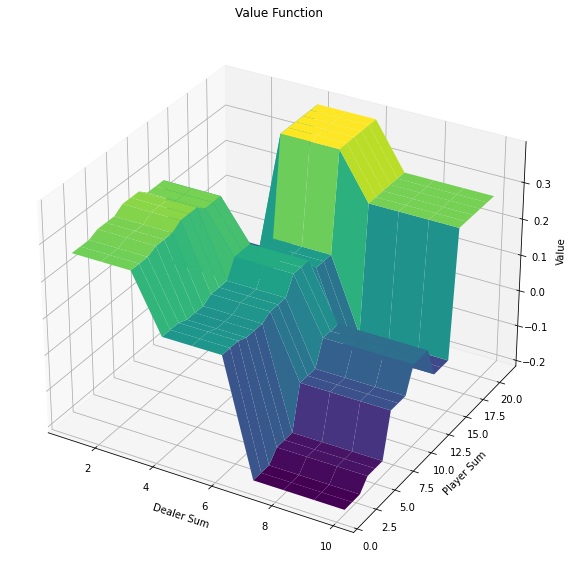

In [9]:
approx_model.plot_value_function()

In [26]:
Evaluator(policy = approx_model).evaluate(num_episodes = 100000)

100%|██████████| 100000/100000 [00:15<00:00, 6378.05it/s]


0.03777

# REINFORCE

In [11]:
policy_approx_model = Easy21PolicyApproximation()
reinforce_simulator = REINFORCESimulator(model = policy_approx_model, learning_rate = 0.01)
reinforce_simulator.run(num_episodes = 100000)

100%|██████████| 100000/100000 [02:17<00:00, 726.92it/s]


In [28]:
Evaluator(policy = policy_approx_model).evaluate(num_episodes = 100000)

100%|██████████| 100000/100000 [00:12<00:00, 8106.60it/s]


0.03648

# Actor-Critic

In [13]:
actor_model = Easy21PolicyApproximation()
critic_model = Easy21ActionValueApproximation()
actor_critic_simulator = ActorCriticSimulator(actor_model = actor_model, critic_model = critic_model, lambda_ = 0, actor_learning_rate = 0.01, critic_learning_rate=0.01)
actor_critic_simulator.run(num_episodes = 100000)

100%|██████████| 100000/100000 [01:06<00:00, 1492.94it/s]


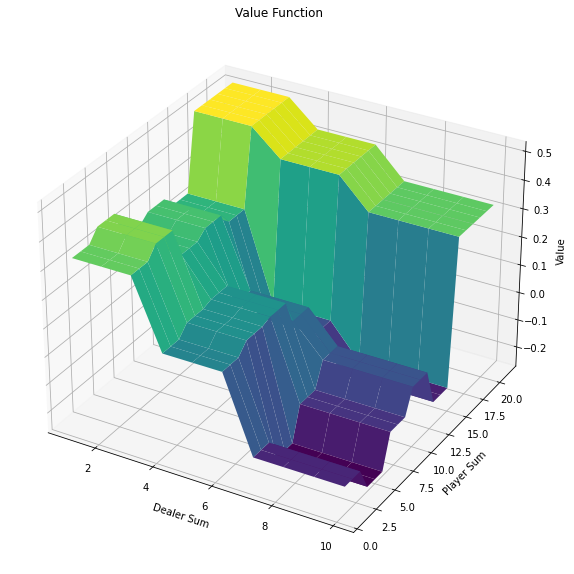

In [14]:
critic_model.plot_value_function()

In [27]:
Evaluator(policy = actor_model).evaluate(num_episodes = 100000)

100%|██████████| 100000/100000 [00:12<00:00, 7825.44it/s]


0.0171

# Advantage

In [3]:
advantage_actor_model = Easy21PolicyApproximation()
advantage_critic_model = Easy21StateValueApproximation()
actor_critic_simulator = AdvantageSimulator(actor_model = advantage_actor_model, critic_model = advantage_critic_model, lambda_ = 0, actor_learning_rate = 0.01, critic_learning_rate=0.01)
actor_critic_simulator.run(num_episodes = 100000)

100%|██████████| 100000/100000 [02:12<00:00, 754.34it/s]


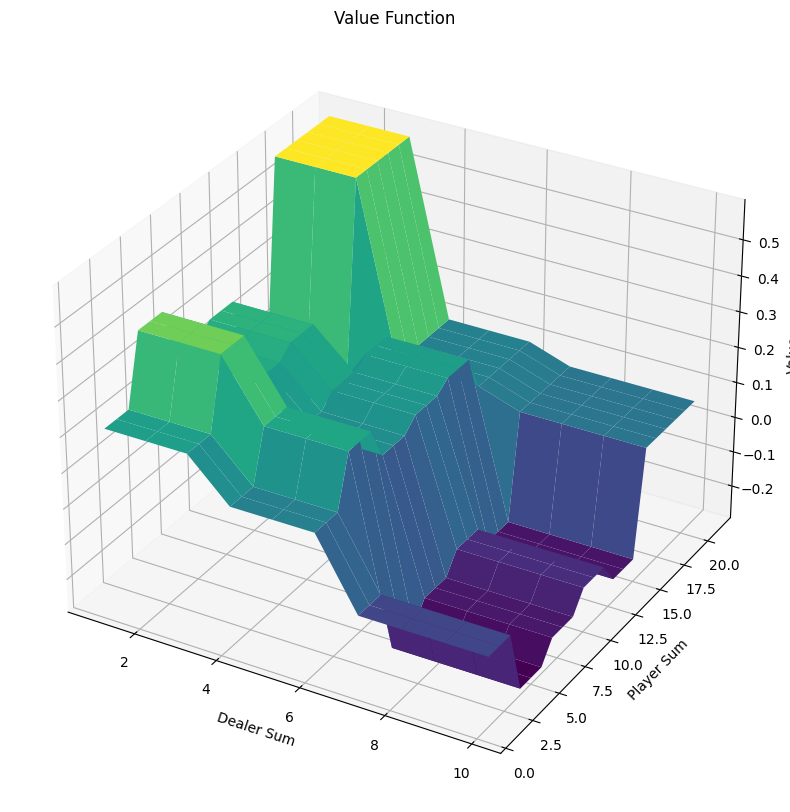

In [4]:
advantage_critic_model.plot_value_function()

In [5]:
Evaluator(policy = advantage_actor_model).evaluate(num_episodes = 10000)

100%|██████████| 10000/10000 [00:02<00:00, 4581.10it/s]


0.0408